# Importando a base de dados.

#### Com base em uma amostra de dados de gorjetas de outros países, onde não existe uma taxa fixa, vamos avaliar quatro tópicos: 

##### 1 - Se o valor da conta influência no valor da gorjeta e se esse aumento é proporcional
##### 2 - Verificar a diferença de valores das gorjetas de quem pediu e quem não pediu sobremesa
##### 3 - Verificar se o dia da semana interfere no valor da gorjeta
##### 4 - Verificar em qual hora do dia a gorjeta é maior

In [1]:
import pandas as pd

dados_raw = pd.read_csv('tips.csv')

In [2]:
dados_raw.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Organizando os dados

In [3]:
# Utilizando o 'rename' vamos trocar os nomes das colunas

dados = dados_raw.rename(columns={'total_bill': 'Total_da_conta', 
                      'tip':'Gorjeta', 
                      'dessert':'Sobremesa', 
                      'day':'Dia_da_Semana', 
                      'time':'Horario_do_Dia', 
                      'size':'Quantidade_de_pessoas'})

In [4]:
dados.head()

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
dados.Sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
# Utilizando o 'map' podemos utilizar um dicionário para renomear os valores de todas a linhas

dados.Sobremesa = dados.Sobremesa.map({'No':'Não', 'Yes':'Sim'})

In [7]:
dados.Dia_da_Semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [8]:
dados.Dia_da_Semana = dados.Dia_da_Semana.map({'Sun':'Domingo', 'Sat':'Sábado','Thur':'Quinta-Feira','Fri':'Sexta-Feira'})

In [9]:
dados.Horario_do_Dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
dados.Horario_do_Dia = dados.Horario_do_Dia.map({'Dinner':'Jantar', 'Lunch':'Almoço'})

In [11]:
dados

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# **Análise exploratória - parte 1**

**Aqui vamos explorar o tópico 1:**

*1 - Verificar se o valor da conta influencia no valor da gorjeta e se esse aumento é proporcional*


In [12]:
import seaborn as sns

In [13]:
dados.columns

Index(['Total_da_conta', 'Gorjeta', 'Sobremesa', 'Dia_da_Semana',
       'Horario_do_Dia', 'Quantidade_de_pessoas'],
      dtype='object')

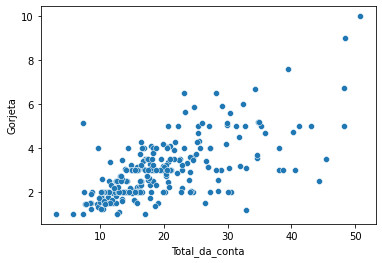

In [24]:
# Vamos criar um gráfico do tipo scatterplot para tentar ancontrar alguma relação entre o valor da conta e a gorjeta.
# Para plotar o gráfico nós devemos passar três argumentos:

# x = Os valores que serão representados no eixo x
# y = Os valores que serão representados no eixo y
# data = A base de dados que será utilizada

sns.scatterplot(x='Total_da_conta', y='Gorjeta', data=dados)

**Inicialmente, o valor da gorjeta parece aumentar conforme o valor total da conta também aumenta.**

In [15]:
# A mensagem <matplotlib.axes._subplots.AxesSubplot at 0x7fa917f4be90> que aparece acima da imagem é o endereço da memória onde a imagem está armazenada.
# Você pode utilizar uma variável para armazenar esse endereço, assim ele não aparecerá acima da imagem.

# EX:
# Criei uma variável chamada 'MI' para armazenar esse valor

# MI = sns.scatterplot(x='Total_da_conta', y='Gorjeta', data=dados)

# MI => Armazena o endereço de memória onde a imágem está localizada.

**Vamos visualizar se nossa base possui valore nulos**

In [16]:
# Vmaos visulizar uma amostra dos dados

dados.head()

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [17]:
# Utilizando o 'info' podemos ver que temos 244 linhas e, aparentemente, nenhuma dela é NAN

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_da_conta         244 non-null    float64
 1   Gorjeta                244 non-null    float64
 2   Sobremesa              244 non-null    object 
 3   Dia_da_Semana          244 non-null    object 
 4   Horario_do_Dia         244 non-null    object 
 5   Quantidade_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [18]:
# Para confirmar, vamos utilizar o método 'count'. Ele vai contar todos os registros que não são nulos.

print(f'A base de dados possui {dados.shape[0]} registros\n')

dados.count() # Conta os valores não nulos

A base de dados possui 244 registros



Total_da_conta           244
Gorjeta                  244
Sobremesa                244
Dia_da_Semana            244
Horario_do_Dia           244
Quantidade_de_pessoas    244
dtype: int64

**Confirmando que a nossa base de dados não possui valores nulos, nós podemos, em um primeiro momento, confirmar que nossa primeira visualização representada no gráfico está correta**

# Criando o campo porcentagem (%)

**A coluna 'porcentagem' mostra a porcentagem da gorjeta em relação ao valor total da compra.**

In [19]:
dados.head()

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [20]:
dados['Porcentagem(%)'] = ((dados['Gorjeta']) / (dados['Total_da_conta']) * 100).round(2)
dados.head()

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas,Porcentagem(%)
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


# **Análise exploratória - parte 2**

Descobrindo se o aumento da gorjeta é proporcional ao aumento do valor total da conta.

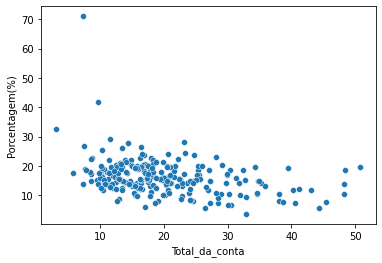

In [21]:
MI = sns.scatterplot(x='Total_da_conta', y='Porcentagem(%)', data=dados)

**Visualmente, podemos perceber que o aumento do valor da gorjeta não é proporcional ao aumento do valor total da compra.**

**Nesse caso, mesmo que o valor da gorjeta seja maior quando o valor total da compra também é, esse aumento não é proporcional.**

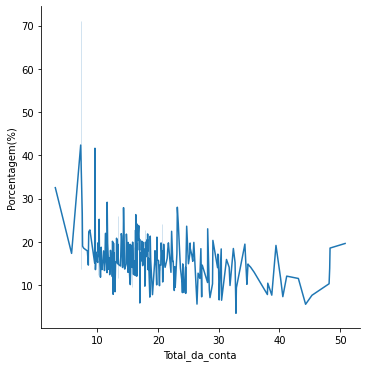

In [22]:
# Existem outros tipode gráfico que podem tentar ajudar na visualização

# No gráfico abaixo, utilizando o 'relplot' podemos notar uma leve queda.

MI = sns.relplot(x='Total_da_conta', y='Porcentagem(%)', kind='line', data=dados) # O parâmetro 'kind indica o tipo de gráfico que será plotado

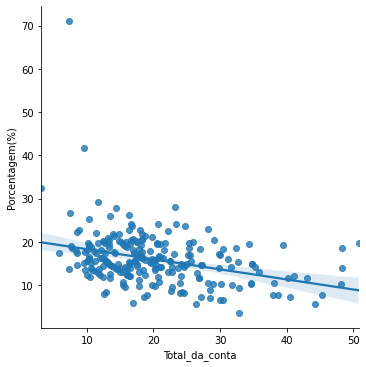

In [23]:
# Utilizando o 'lplot' fica mais evidente a queda da porcentagem quando o valor aumenta

MI = sns.lmplot(x='Total_da_conta', y='Porcentagem(%)', data=dados) 

# Análise descritiva
### **Aqui vamos explorar o tópico 2:**
##### *2 - Verificar a diferença de valores das gorjetas de quem pediu e quem não pediu sobremesa*



In [26]:
dados.head()

,Total_da_conta,Gorjeta,Sobremesa,Dia_da_Semana,Horario_do_Dia,Quantidade_de_pessoas,Porcentagem(%)
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [32]:
# Vendo a descrição de quem pediu sobremesa

dados[dados.Sobremesa == 'Sim'].describe()

,Total_da_conta,Gorjeta,Quantidade_de_pessoas,Porcentagem(%)
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [34]:
# Vendo a descrição de quem não pediu sobremesa

dados[dados.Sobremesa == 'Não'].describe()

,Total_da_conta,Gorjeta,Quantidade_de_pessoas,Porcentagem(%)
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


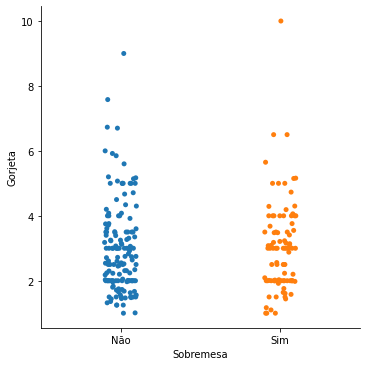

In [38]:
# Com o gráfico abaixo podemos fazer uma breve comparação entre quem pediu e não pediu sobremesa.
# Podemos ver que existe uma diferença mínima, mas não fica muito claro nesse gráfico.

MI = sns.catplot(x='Sobremesa', y='Gorjeta', data= dados)

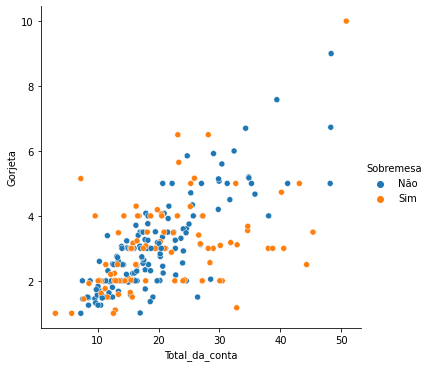

In [39]:
MI = sns.relplot(x='Total_da_conta', y='Gorjeta', hue='Sobremesa', data=dados)

# O parâmetro 'hue' agrupa os os elementos por cores baseado em uma variável.
# No exemplo abaixo, nós comparamos o valor da gorjeta com o valor total da conta, agrupando por quem pediu e não pediu sobremesa.

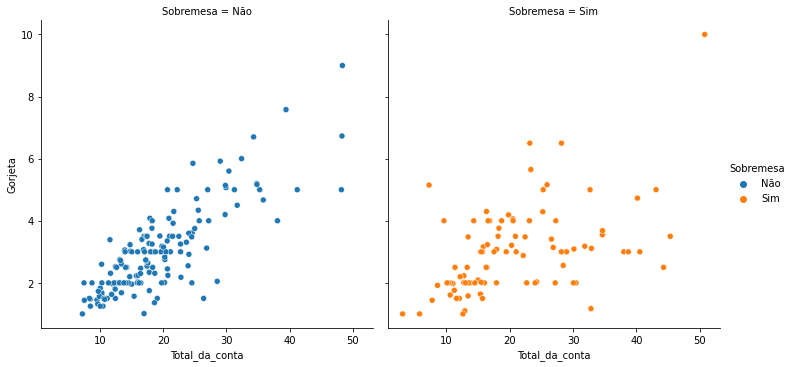

In [42]:
# Vamos dividir o gráfico anterior em duas colunas separadas.
# Para fazer isso, basta passar mais um parâmetro, o 'col'. Esse parâmetro divide o conjunto com base na variável fornecida.

MI = sns.relplot(x='Total_da_conta', y='Gorjeta', hue='Sobremesa', col= 'Sobremesa', data=dados)

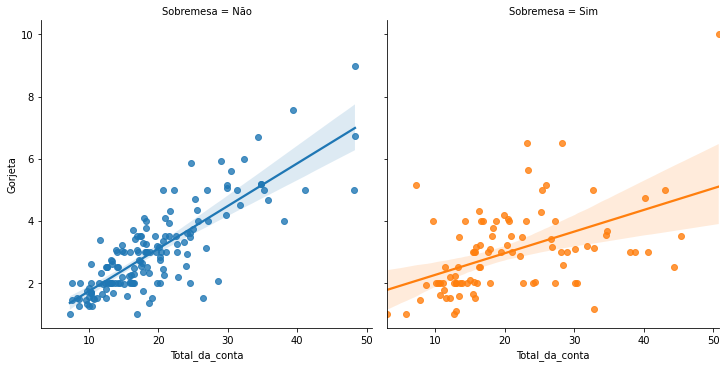

In [43]:
# Abaixo temos um gráfico com a relação 'Total da compra' e 'Gorjeta'

MI = sns.lmplot(x='Total_da_conta', y='Gorjeta', hue='Sobremesa', col= 'Sobremesa', data=dados) 

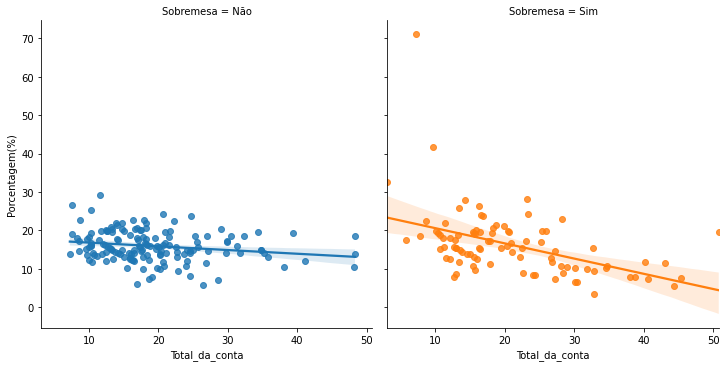

In [44]:
# Vamos criar um gráfico para visualizar a relação entre a 'porcentage' e o 'valor total' de quem pediu e não pediu sobremesa

MI = sns.lmplot(x='Total_da_conta', y='Porcentagem(%)', hue='Sobremesa', col= 'Sobremesa', data=dados) 

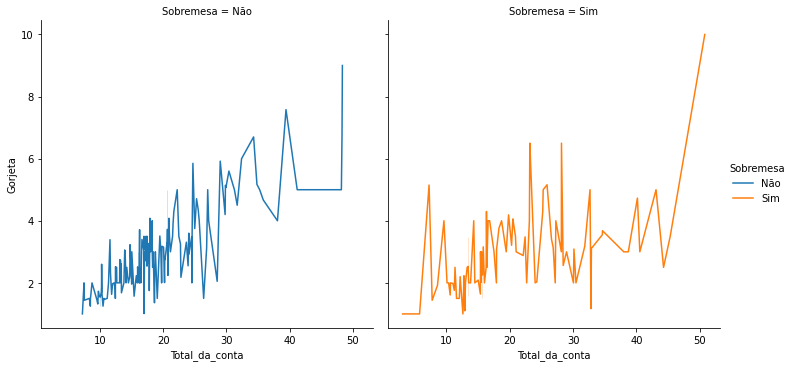

In [46]:
# Com um gráfico de linha temos 'Total da conta' x 'Gorjeta'
 
MI = sns.relplot(x='Total_da_conta', y='Gorjeta', hue='Sobremesa', kind='line', col= 'Sobremesa', data=dados) 

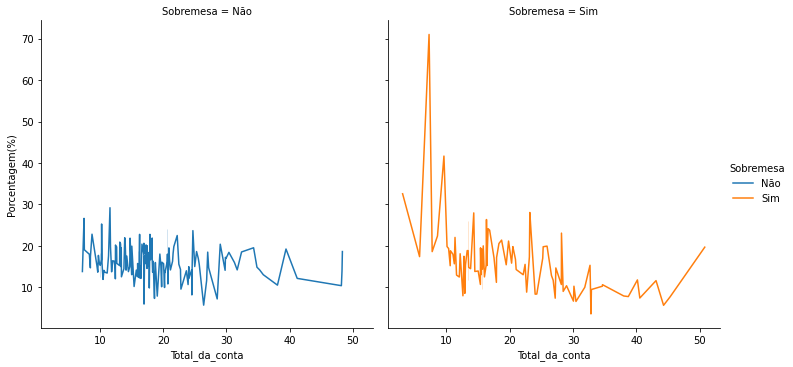

In [47]:
# Com um gráfico de linha temos 'Total da conta' x 'Porcentagem(%)'

MI = sns.relplot(x='Total_da_conta', y='Porcentagem(%)', hue='Sobremesa', kind='line', col= 'Sobremesa', data=dados) 

**Visualmente, podemos perceber que existe uma diferença no valor da gorjeta das pessoas que pediram e das que não pediram sobremesa**

# Teste de hipótese